In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

This code loads data from a CSV file and stores it in a Pandas DataFrame.

In [21]:
# Load the data
data = pd.read_csv('all_ticks_wide.csv')

###  4.1. Descriptive Analysis

Dataset contains 50,012 data points or observations, and each data point has 61 features

In [22]:
data.shape

(50012, 61)

In [23]:
data.head()

timestamp    AEFES   AKBNK    AKSA  AKSEN   ALARK   ALBRK  \
0  2012-09-17T06:45:00Z  22.3978  5.2084  1.7102   3.87  1.4683  1.1356   
1  2012-09-17T07:00:00Z  22.3978  5.1938  1.7066   3.86  1.4574  1.1275   
2  2012-09-17T07:15:00Z  22.3978  5.2084  1.7102    NaN  1.4610  1.1356   
3  2012-09-17T07:30:00Z  22.3978  5.1938  1.7102   3.86  1.4537  1.1275   
4  2012-09-17T07:45:00Z  22.5649  5.2084  1.7102   3.87  1.4574  1.1356   

    ANACM   ARCLK   ASELS  ...   TTKOM  TUKAS    TUPRS    USAK   VAKBN  VESTL  \
0  1.0634  6.9909  2.9948  ...  4.2639   0.96  29.8072  1.0382  3.8620   1.90   
1  1.0634  6.9259  2.9948  ...  4.2521   0.96  29.7393  1.0382  3.8529   1.90   
2  1.0679  6.9909  2.9855  ...  4.2521   0.97  29.6716  1.0463  3.8436   1.91   
3  1.0679  6.9584  2.9855  ...  4.2521   0.97  29.7393  1.0382  3.8529   1.91   
4  1.0725  6.9909  2.9760  ...  4.2521   0.97  29.8072  1.0382  3.8620   1.90   

    YATAS   YKBNK   YUNSA   ZOREN  
0  0.4172  2.5438  2.2619  0.7789  
1  0.4229  2.5266  2.2462  0.7789  
2  0.4229  2.5266  2.2566  0.7789  
3  0.4286  2.5324  2.2619  0.7860  
4  0.4286  2.5324  2.2619  0.7789  

[5 rows x 61 columns]

In [24]:
data.tail()

timestamp  AEFES  AKBNK  AKSA  AKSEN  ALARK  ALBRK  ANACM  \
50007  2019-07-23T14:00:00Z  20.48   7.73  9.14   2.47   3.23   1.21   2.84   
50008  2019-07-23T14:15:00Z  20.50   7.72  9.14   2.47   3.22   1.21   2.84   
50009  2019-07-23T14:30:00Z  20.50   7.74  9.13   2.46   3.23   1.21   2.83   
50010  2019-07-23T14:45:00Z  20.40   7.70  9.14   2.47   3.24   1.21   2.82   
50011  2019-07-23T15:00:00Z  20.46   7.70  9.14   2.47   3.23   1.20   2.83   

       ARCLK  ASELS  ...  TTKOM  TUKAS  TUPRS  USAK  VAKBN  VESTL  YATAS  \
50007  20.30    NaN  ...   5.60   4.34  131.6  1.05   4.86   9.98   5.35   
50008  20.32    NaN  ...   5.57   4.35  131.5  1.05   4.86   9.98   5.34   
50009  20.34    NaN  ...   5.57   4.36  131.5  1.05   4.86   9.96   5.34   
50010  20.38    NaN  ...   5.57   4.35  131.3  1.04   4.86   9.94   5.34   
50011  20.32    NaN  ...   5.56   4.34  131.8  1.05   4.85   9.93   5.33   

       YKBNK  YUNSA  ZOREN  
50007   2.75   4.25    NaN  
50008   2.75   4.24    NaN  
50009   2.76   4.24    NaN  
50010   2.77   4.24    NaN  
50011   2.77   4.24    NaN  

[5 rows x 61 columns]



- For most columns, there are non-null values, indicating that the majority of entries have valid data. However, some columns have missing values, as indicated by the difference between the total number of entries (50,012) and the "Non-Null Count" for each column.
- All of the columns except timestamp have null values. ISDMR column have huge amount of null values.


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50012 entries, 0 to 50011
Data columns (total 61 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  50012 non-null  object 
 1   AEFES      48131 non-null  float64
 2   AKBNK      49209 non-null  float64
 3   AKSA       48594 non-null  float64
 4   AKSEN      48171 non-null  float64
 5   ALARK      48335 non-null  float64
 6   ALBRK      46862 non-null  float64
 7   ANACM      48165 non-null  float64
 8   ARCLK      49045 non-null  float64
 9   ASELS      48803 non-null  float64
 10  ASUZU      48433 non-null  float64
 11  AYGAZ      48119 non-null  float64
 12  BAGFS      48650 non-null  float64
 13  BANVT      47951 non-null  float64
 14  BRISA      48937 non-null  float64
 15  CCOLA      48749 non-null  float64
 16  CEMAS      46394 non-null  float64
 17  ECILC      48492 non-null  float64
 18  EREGL      49173 non-null  float64
 19  FROTO      48995 non-null  float64
 20  GARAN 

In [26]:
data.isnull().sum()

timestamp       0
AEFES        1881
AKBNK         803
AKSA         1418
AKSEN        1841
             ... 
VESTL        1231
YATAS        3957
YKBNK         787
YUNSA        4484
ZOREN        1205
Length: 61, dtype: int64

This code calculates and displays the percentage of missing values in each column of the `data` DataFrame.

This code provides insights into the data quality by showing the proportion of missing values in each feature. It is important for data preprocessing and deciding how to handle missing data, whether through imputation or removal.

In [27]:
#to calculate the percentage of missing values in each column
(data.isnull().sum()/(len(data)))*100

timestamp    0.000000
AEFES        3.761097
AKBNK        1.605615
AKSA         2.835320
AKSEN        3.681117
               ...   
VESTL        2.461409
YATAS        7.912101
YKBNK        1.573622
YUNSA        8.965848
ZOREN        2.409422
Length: 61, dtype: float64

There are no duplicated rows in the dataset. Each row in the DataFrame is unique.

In [28]:
print(f"Number of duplicated rows: {data.duplicated().sum()}")

Number of duplicated rows: 0


To calculate summary statistics, describe() function can be used. This will provide measures of central tendency (mean, median) and dispersion (standard deviation, variance) for each numerical column in the dataset.

- `count` indicates the number of non-null entries in each column.

- `mean` is the average value of the data in each column.

- `std` represents the standard deviation, which measures the spread or variability of the data.

- `min` and `max` show the minimum and maximum values in each column, respectively.

- `25%, 50%, 75%` represent the 25th, 50th (median), and 75th percentiles, providing insights into the distribution of the data.

Standard deviations measure the variability of closing prices. For instance, "AKBNK" has a relatively low standard deviation (approximately 0.94), suggesting that its prices tend to be less volatile, while "VESTL" has a higher standard deviation (approximately 2.55), indicating greater price fluctuations.


Outliers: The large gap between the maximum and the 75th percentile in some stocks, such as "VESTL," "YUNSA," and "YKBNK," suggests the presence of outliers or extreme values. 

In [29]:
data.describe()

AEFES         AKBNK          AKSA         AKSEN         ALARK  \
count  48131.000000  49209.000000  48594.000000  48171.000000  48335.000000   
mean      20.982235      6.473105      7.127504      3.183542      2.060859   
std        2.494002      0.944955      2.710033      0.724332      0.575943   
min        0.000100      0.000100      0.000100      0.000000      0.000100   
25%       19.160500      5.850000      5.208800      2.670000      1.568900   
50%       20.646500      6.305700      6.985300      2.930000      1.937600   
75%       22.732000      6.932500      8.720000      3.750000      2.421400   
max       28.509000      9.212400     15.118900      5.190000      3.514300   

              ALBRK         ANACM         ARCLK         ASELS         ASUZU  \
count  46862.000000  48165.000000  49045.000000  48803.000000  48433.000000   
mean       1.365549      1.672102     15.388088     13.432535      6.467033   
std        0.167824      0.788365      4.531459      9.624246      2.201036   
min        1.025500      0.000100      0.000100      0.000100      0.000100   
25%        1.225100      1.047000     11.711100      4.940300      5.074800   
50%        1.360200      1.259700     15.010000      9.275700      5.949600   
75%        1.500000      2.402100     19.087700     22.756700      7.120000   
max        2.190000      3.502100     26.427800     46.761600     15.280000   

       ...         TTKOM         TUKAS         TUPRS          USAK  \
count  ...  49077.000000  45929.000000  49143.000000  47659.000000   
mean   ...      5.660680      1.737529     62.994535      1.220452   
std    ...      0.818598      0.867095     32.398117      0.459532   
min    ...      0.000100      0.650000      0.000100      0.000100   
25%    ...      5.267300      1.060000     34.549100      0.957100   
50%    ...      5.746400      1.530000     49.554200      1.050000   
75%    ...      6.260000      2.130000     93.428700      1.370800   
max    ...      7.350000      5.920000    139.293700      2.757800   

              VAKBN         VESTL         YATAS         YKBNK         YUNSA  \
count  49212.000000  48781.000000  46055.000000  49225.000000  45528.000000   
mean       4.735438      5.942711      2.434249      2.566327      4.079695   
std        0.977889      2.830465      2.552377      0.422774      1.347020   
min        0.000100      0.000000      0.000100      0.000100      0.000100   
25%        4.032200      4.020000      0.388600      2.268200      3.006700   
50%        4.474200      6.320000      0.965800      2.609300      4.107800   
75%        5.246000      7.450000      4.230000      2.874000      4.720600   
max        7.581400     14.540000     10.674800      3.958100      9.527500   

              ZOREN  
count  48807.000000  
mean       1.248124  
std        0.311330  
min        0.000100  
25%        1.033800  
50%        1.250000  
75%        1.426500  
max        2.443000  

[8 rows x 60 columns]

The code removes the row with the minimum value (probably false data) in the dataset. Since there is exception such as min value is outlier for every column. 

In [32]:
min_index = data['AEFES'].idxmin()
data.iloc[min_index: min_index+1]

timestamp   AEFES   AKBNK    AKSA  AKSEN   ALARK  ALBRK  \
4159  2013-05-06T16:45:00Z  0.0001  0.0001  0.0001    0.0  0.0001    NaN   

       ANACM   ARCLK   ASELS  ...   TTKOM  TUKAS   TUPRS    USAK   VAKBN  \
4159  0.0001  0.0001  0.0001  ...  0.0001    NaN  0.0001  0.0001  0.0001   

      VESTL   YATAS   YKBNK   YUNSA   ZOREN  
4159    0.0  0.0001  0.0001  0.0001  0.0001  

[1 rows x 61 columns]

In [33]:
data = data.drop(min_index)
data.shape

(50011, 61)

'timestamp' column is converted to datetime and used as the index for the Data. This is particularly useful when working with time-series data.

In [34]:
# Convert the 'timestamp' column to a datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
data

AEFES   AKBNK    AKSA  AKSEN   ALARK   ALBRK  \
timestamp                                                                   
2012-09-17 06:45:00+00:00  22.3978  5.2084  1.7102   3.87  1.4683  1.1356   
2012-09-17 07:00:00+00:00  22.3978  5.1938  1.7066   3.86  1.4574  1.1275   
2012-09-17 07:15:00+00:00  22.3978  5.2084  1.7102    NaN  1.4610  1.1356   
2012-09-17 07:30:00+00:00  22.3978  5.1938  1.7102   3.86  1.4537  1.1275   
2012-09-17 07:45:00+00:00  22.5649  5.2084  1.7102   3.87  1.4574  1.1356   
...                            ...     ...     ...    ...     ...     ...   
2019-07-23 14:00:00+00:00  20.4800  7.7300  9.1400   2.47  3.2300  1.2100   
2019-07-23 14:15:00+00:00  20.5000  7.7200  9.1400   2.47  3.2200  1.2100   
2019-07-23 14:30:00+00:00  20.5000  7.7400  9.1300   2.46  3.2300  1.2100   
2019-07-23 14:45:00+00:00  20.4000  7.7000  9.1400   2.47  3.2400  1.2100   
2019-07-23 15:00:00+00:00  20.4600  7.7000  9.1400   2.47  3.2300  1.2000   

                            ANACM    ARCLK   ASELS   ASUZU  ...   TTKOM  \
timestamp                                                   ...           
2012-09-17 06:45:00+00:00  1.0634   6.9909  2.9948  2.4998  ...  4.2639   
2012-09-17 07:00:00+00:00  1.0634   6.9259  2.9948  2.5100  ...  4.2521   
2012-09-17 07:15:00+00:00  1.0679   6.9909  2.9855  2.4796  ...  4.2521   
2012-09-17 07:30:00+00:00  1.0679   6.9584  2.9855  2.4897  ...  4.2521   
2012-09-17 07:45:00+00:00  1.0725   6.9909  2.9760  2.4897  ...  4.2521   
...                           ...      ...     ...     ...  ...     ...   
2019-07-23 14:00:00+00:00  2.8400  20.3000     NaN  8.1300  ...  5.6000   
2019-07-23 14:15:00+00:00  2.8400  20.3200     NaN  8.0400  ...  5.5700   
2019-07-23 14:30:00+00:00  2.8300  20.3400     NaN  8.0900  ...  5.5700   
2019-07-23 14:45:00+00:00  2.8200  20.3800     NaN  7.9800  ...  5.5700   
2019-07-23 15:00:00+00:00  2.8300  20.3200     NaN  7.9700  ...  5.5600   

                           TUKAS     TUPRS    USAK   VAKBN  VESTL   YATAS  \
timestamp                                                                   
2012-09-17 06:45:00+00:00   0.96   29.8072  1.0382  3.8620   1.90  0.4172   
2012-09-17 07:00:00+00:00   0.96   29.7393  1.0382  3.8529   1.90  0.4229   
2012-09-17 07:15:00+00:00   0.97   29.6716  1.0463  3.8436   1.91  0.4229   
2012-09-17 07:30:00+00:00   0.97   29.7393  1.0382  3.8529   1.91  0.4286   
2012-09-17 07:45:00+00:00   0.97   29.8072  1.0382  3.8620   1.90  0.4286   
...                          ...       ...     ...     ...    ...     ...   
2019-07-23 14:00:00+00:00   4.34  131.6000  1.0500  4.8600   9.98  5.3500   
2019-07-23 14:15:00+00:00   4.35  131.5000  1.0500  4.8600   9.98  5.3400   
2019-07-23 14:30:00+00:00   4.36  131.5000  1.0500  4.8600   9.96  5.3400   
2019-07-23 14:45:00+00:00   4.35  131.3000  1.0400  4.8600   9.94  5.3400   
2019-07-23 15:00:00+00:00   4.34  131.8000  1.0500  4.8500   9.93  5.3300   

                            YKBNK   YUNSA   ZOREN  
timestamp                                          
2012-09-17 06:45:00+00:00  2.5438  2.2619  0.7789  
2012-09-17 07:00:00+00:00  2.5266  2.2462  0.7789  
2012-09-17 07:15:00+00:00  2.5266  2.2566  0.7789  
2012-09-17 07:30:00+00:00  2.5324  2.2619  0.7860  
2012-09-17 07:45:00+00:00  2.5324  2.2619  0.7789  
...                           ...     ...     ...  
2019-07-23 14:00:00+00:00  2.7500  4.2500     NaN  
2019-07-23 14:15:00+00:00  2.7500  4.2400     NaN  
2019-07-23 14:30:00+00:00  2.7600  4.2400     NaN  
2019-07-23 14:45:00+00:00  2.7700  4.2400     NaN  
2019-07-23 15:00:00+00:00  2.7700  4.2400     NaN  

[50011 rows x 60 columns]

The provided code snippet performs various analyses and visualizations on numerical columns in the data, including calculating skewness and kurtosis, as well as creating line plots, histograms, kernel density estimation plots, and box plots for each column. 
This is used to quickly analyze and visualize the numerical columns in dataset, exploring their distribution and statistical properties.

AEFES
Skew : 0.32
Kurtosis : -0.54


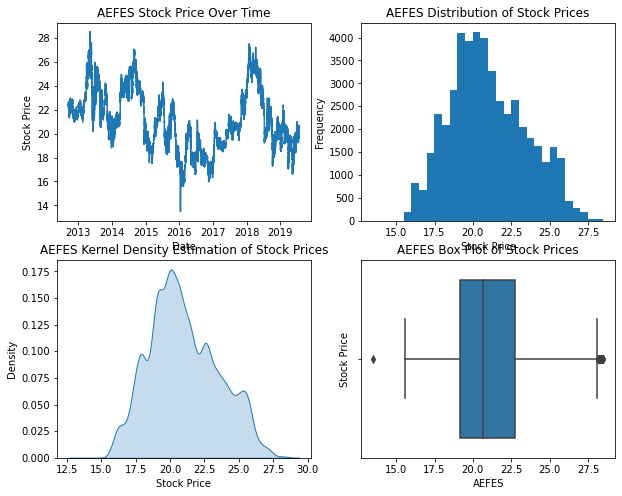

AKBNK
Skew : 0.59
Kurtosis : -0.08


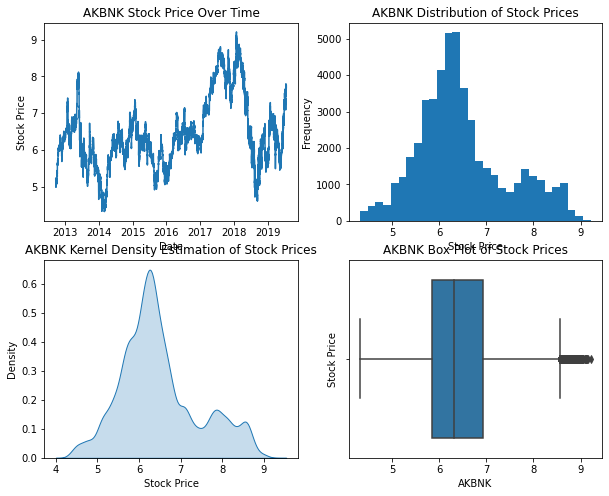

AKSA
Skew : 0.17
Kurtosis : -0.1


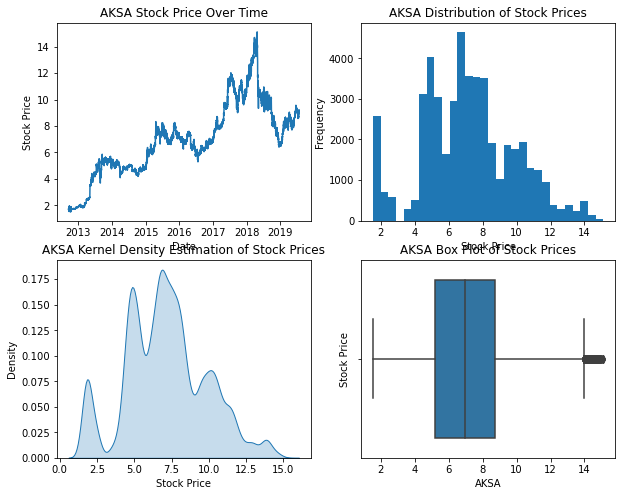

AKSEN
Skew : 0.83
Kurtosis : -0.36


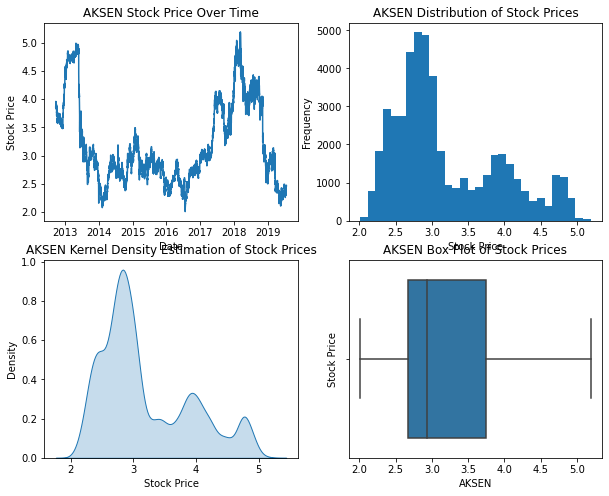

ALARK
Skew : 0.65
Kurtosis : -0.54


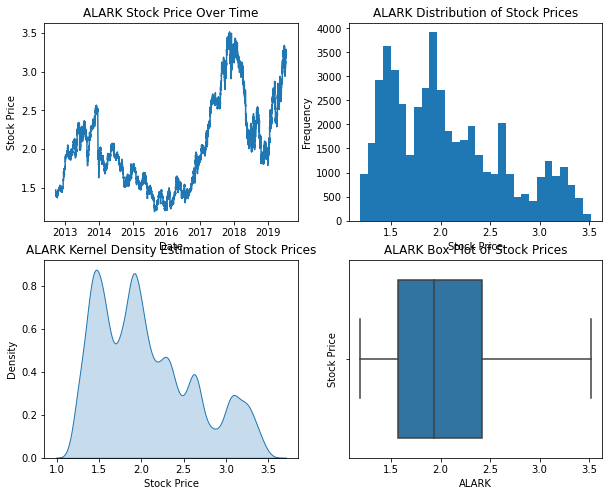

ALBRK
Skew : 0.39
Kurtosis : 0.19


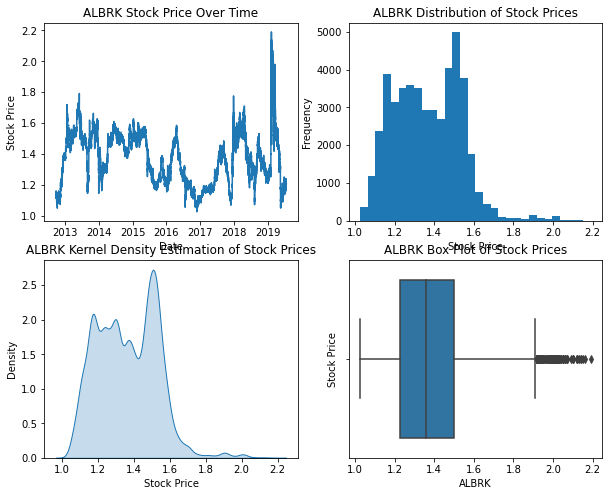

ANACM
Skew : 0.71
Kurtosis : -1.05


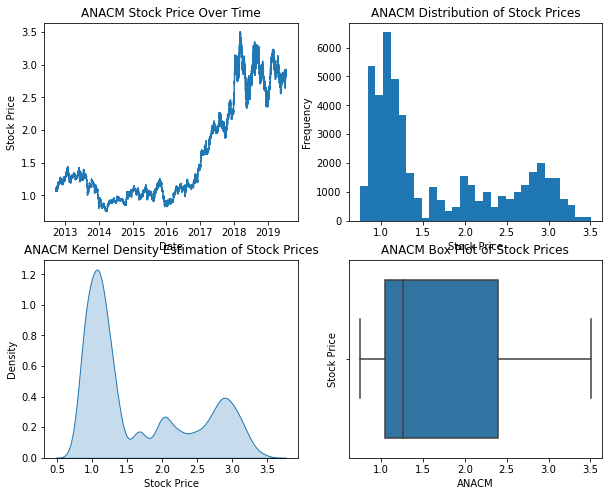

ARCLK
Skew : 0.12
Kurtosis : -0.77


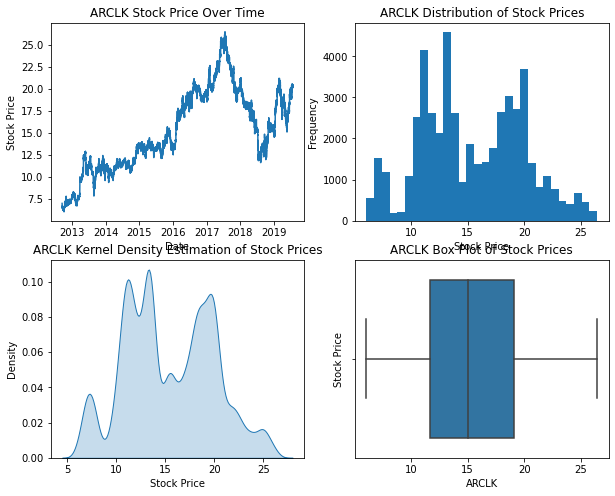

ASELS
Skew : 0.7
Kurtosis : -0.92


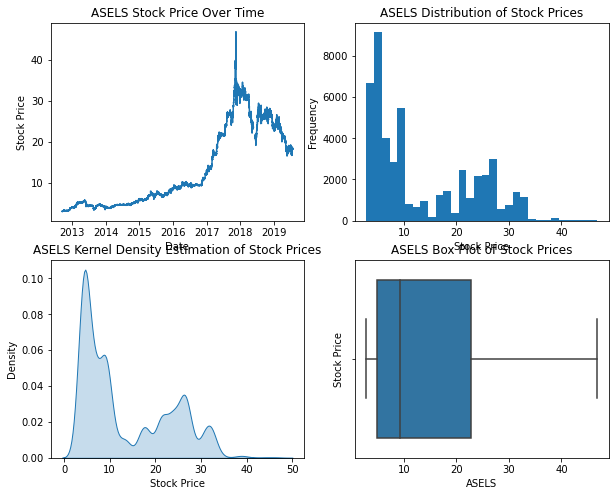

ASUZU
Skew : 1.48
Kurtosis : 2.35


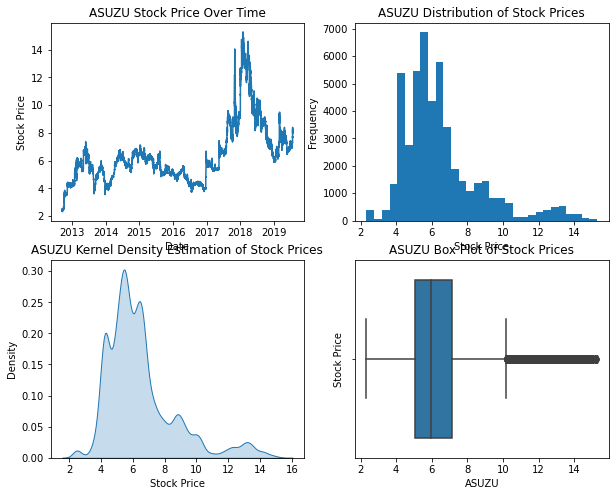

AYGAZ
Skew : 0.3
Kurtosis : -1.07


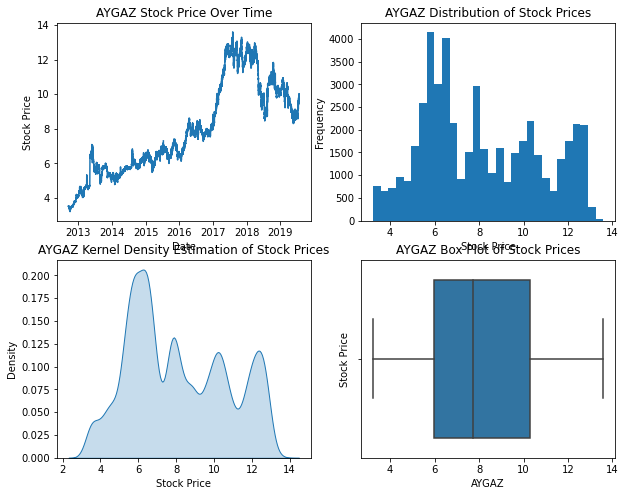

BAGFS
Skew : 2.97
Kurtosis : 21.33


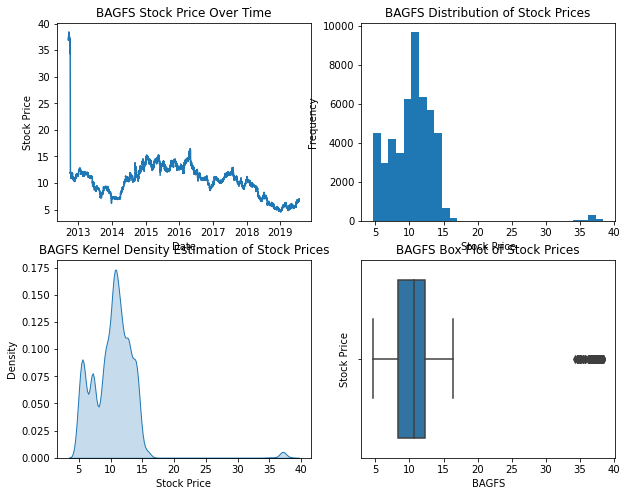

BANVT
Skew : 1.01
Kurtosis : -0.0


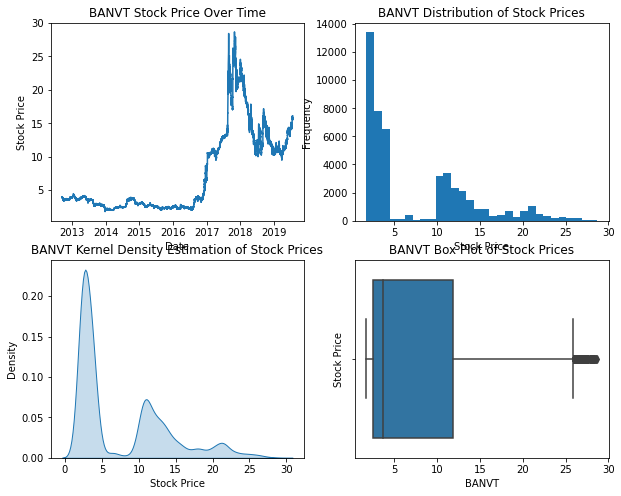

BRISA
Skew : -0.17
Kurtosis : -0.18


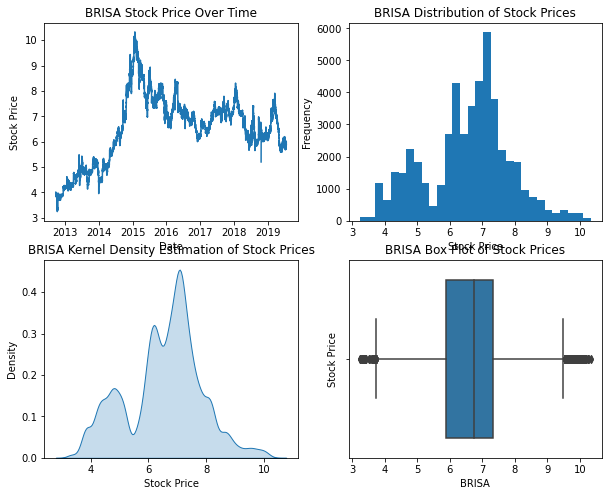

CCOLA
Skew : 0.61
Kurtosis : -0.69


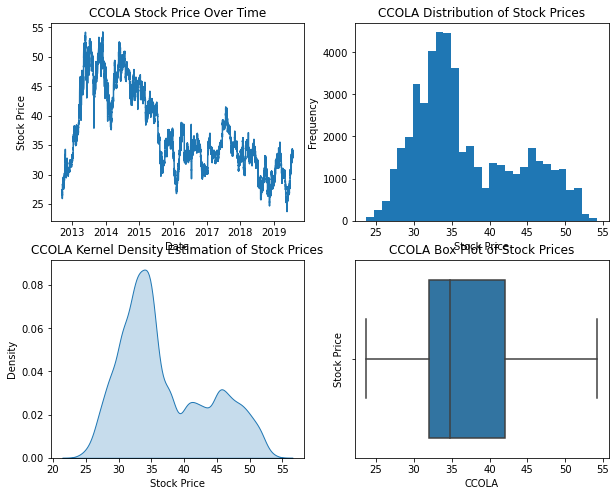

CEMAS
Skew : 2.35
Kurtosis : 7.84


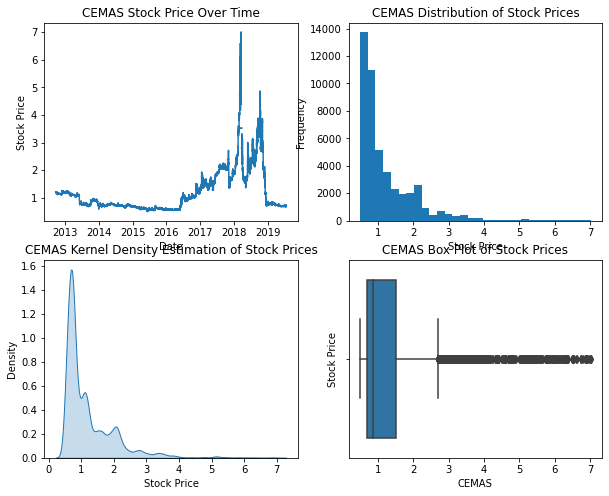

ECILC
Skew : 0.5
Kurtosis : -1.06


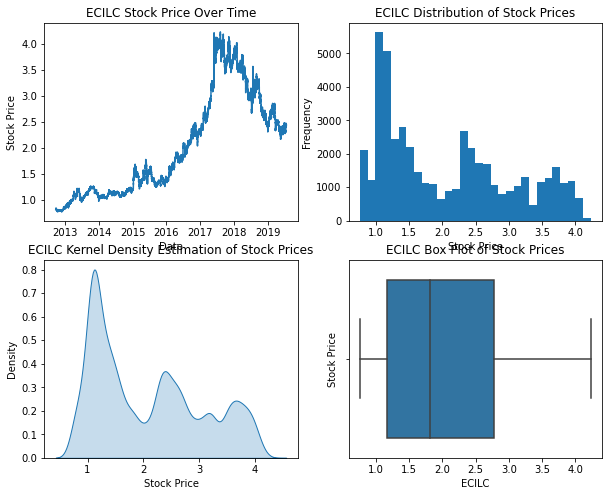

EREGL
Skew : 0.57
Kurtosis : -1.03


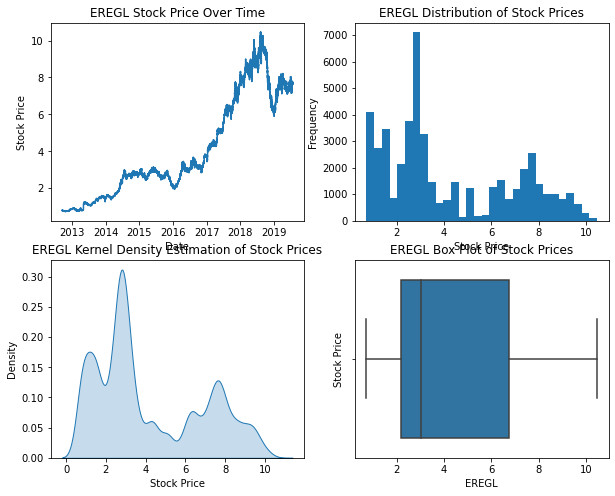

FROTO
Skew : 0.57
Kurtosis : -1.04


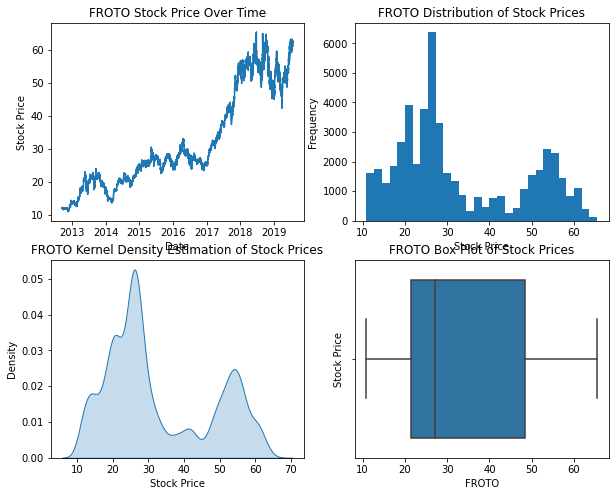

GARAN
Skew : 0.67
Kurtosis : 0.06


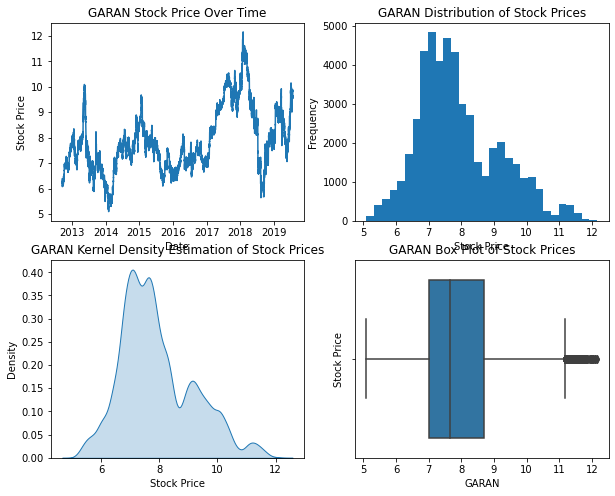

GOODY
Skew : 10.2
Kurtosis : 623.68


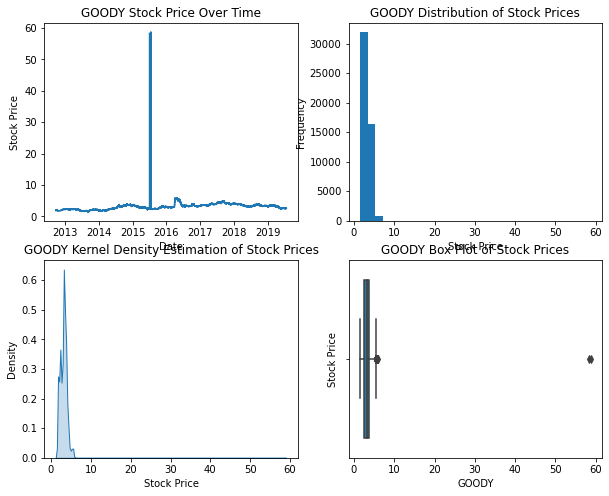

GUBRF
Skew : 0.5
Kurtosis : -0.44


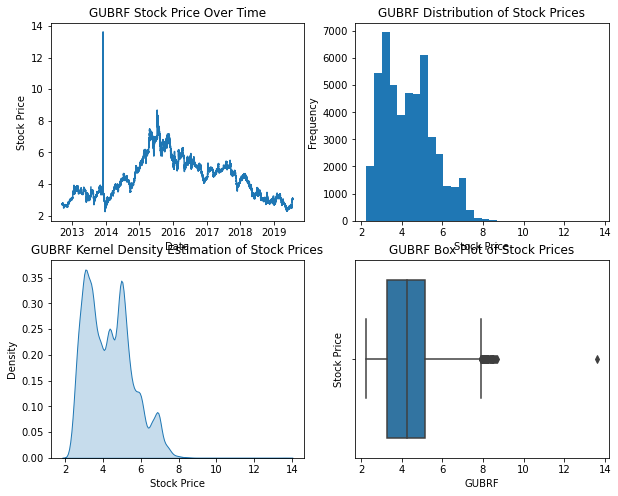

HALKB
Skew : 0.21
Kurtosis : -0.6


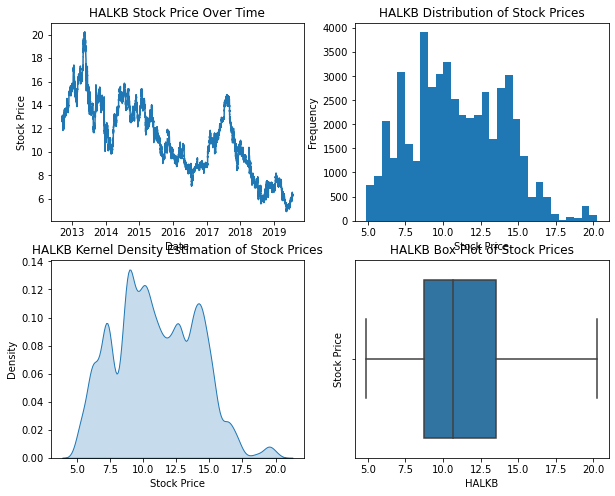

ICBCT
Skew : 1.49
Kurtosis : 2.61


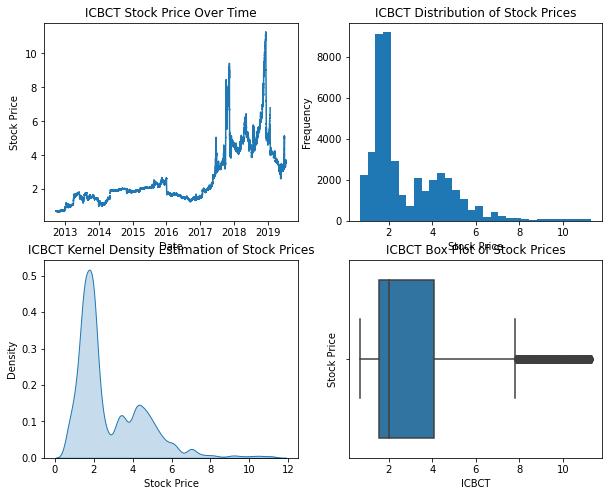

ISCTR
Skew : 0.7
Kurtosis : -0.59


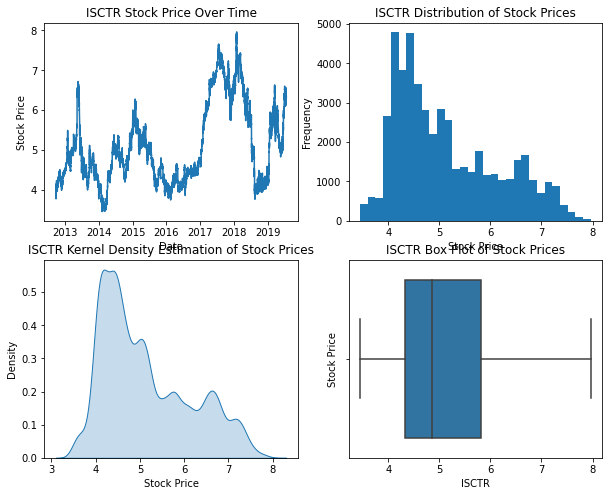

ISDMR
Skew : -1.23
Kurtosis : 0.33


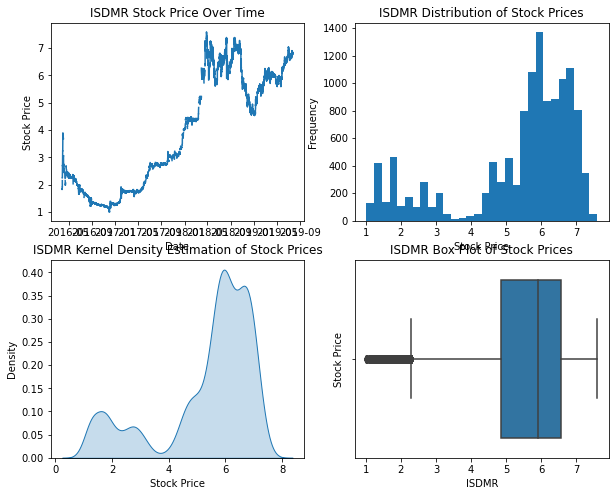

ISFIN
Skew : 2.17
Kurtosis : 4.17


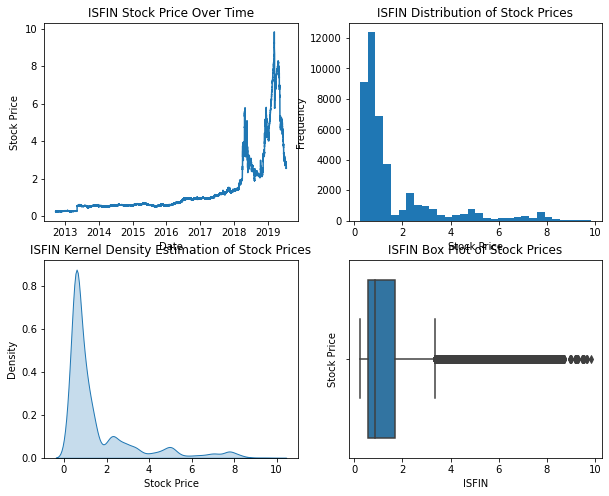

ISYAT
Skew : 0.53
Kurtosis : 1.06


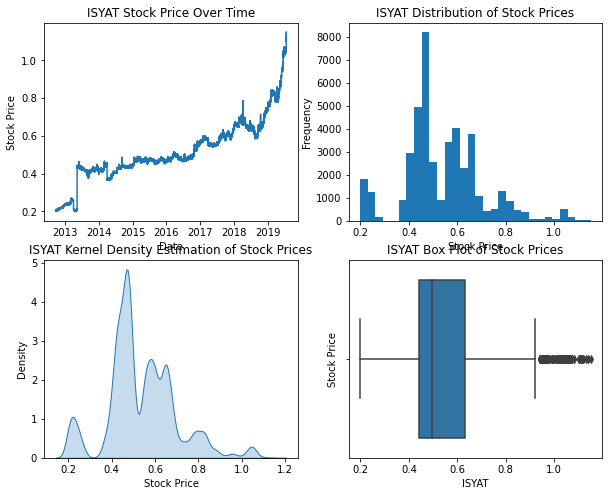

KAREL
Skew : 0.86
Kurtosis : -0.69


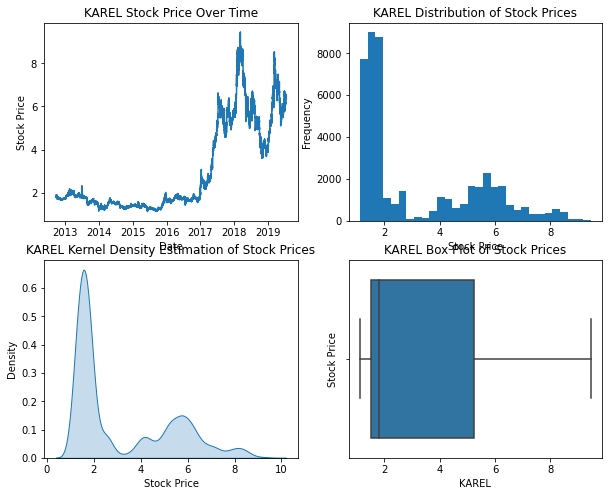

KARSN
Skew : 1.03
Kurtosis : 1.28


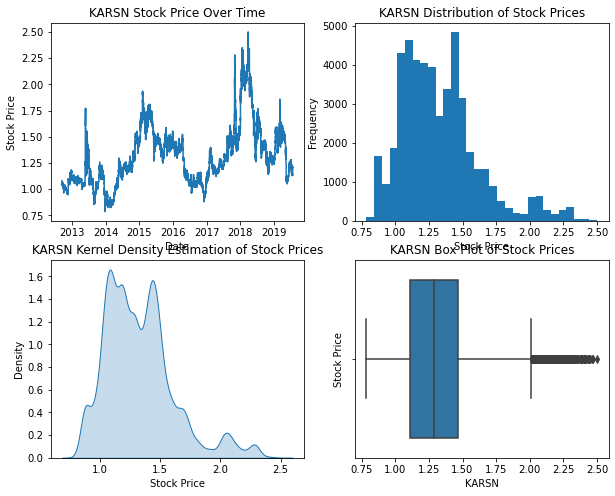

KCHOL
Skew : 0.04
Kurtosis : -1.09


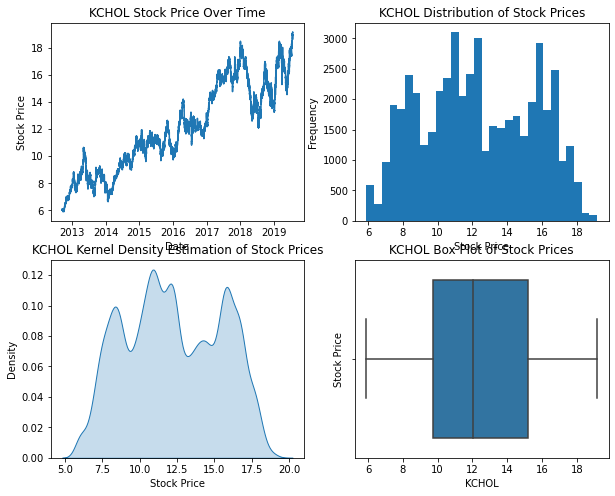

KRDMB
Skew : 0.5
Kurtosis : -0.5


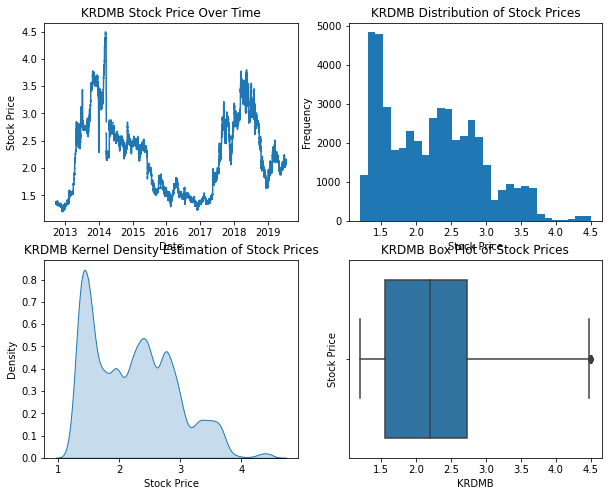

KRDMD
Skew : 1.37
Kurtosis : 1.13


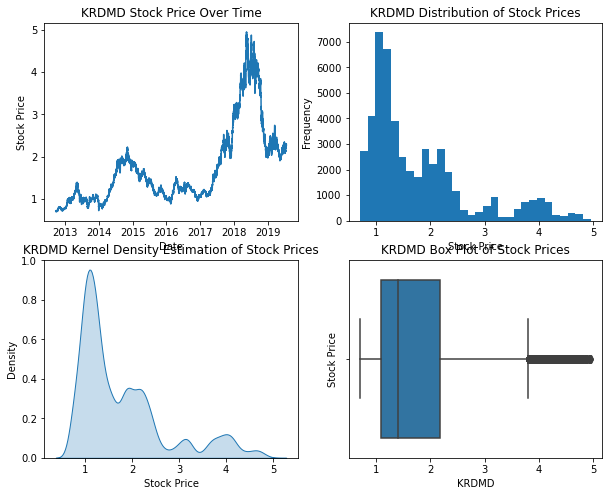

MGROS
Skew : 0.47
Kurtosis : -0.35


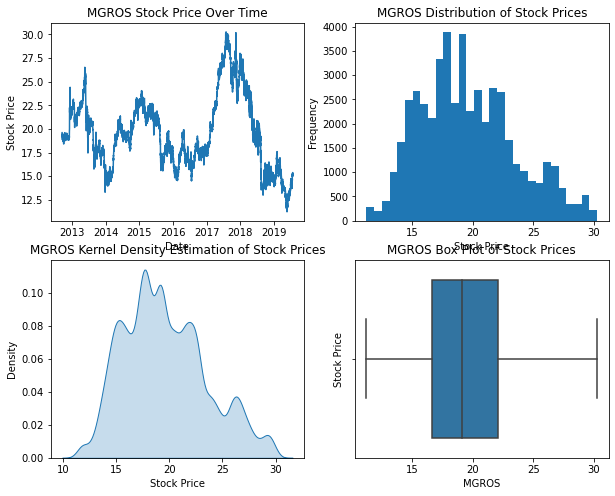

OTKAR
Skew : -0.23
Kurtosis : -0.89


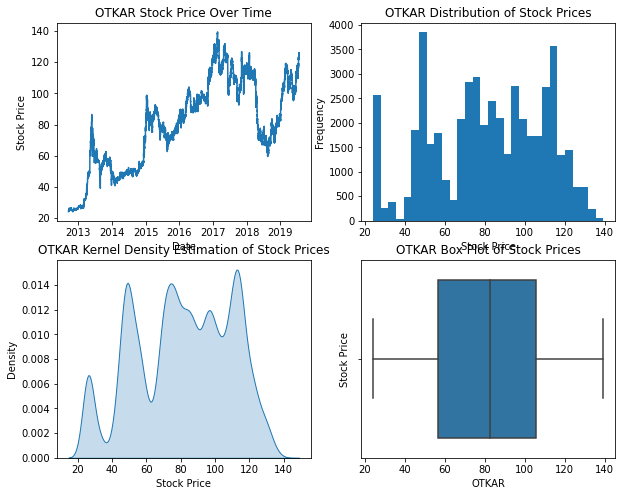

PARSN
Skew : 1.12
Kurtosis : 1.93


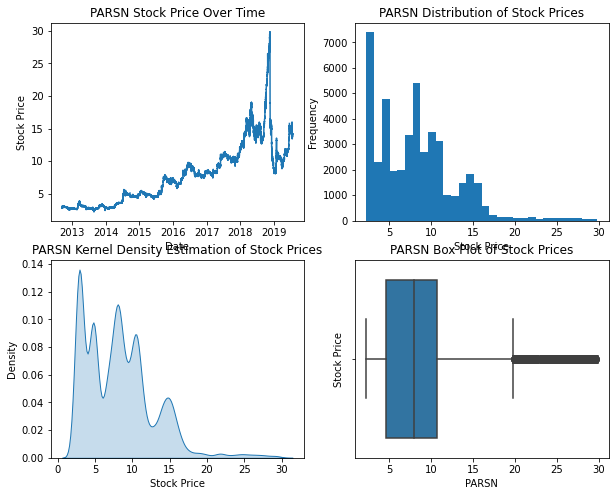

PETKM
Skew : 0.47
Kurtosis : -1.12


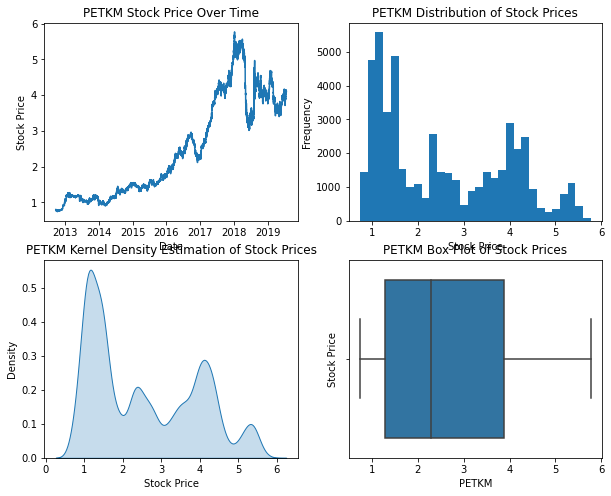

PGSUS
Skew : 0.22
Kurtosis : -0.32


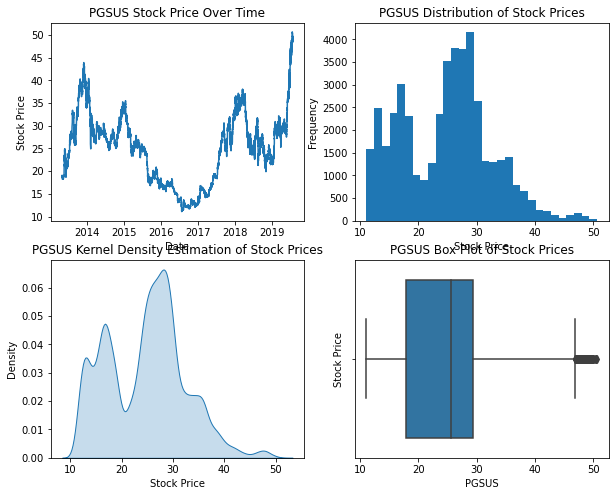

PRKME
Skew : 0.66
Kurtosis : -0.65


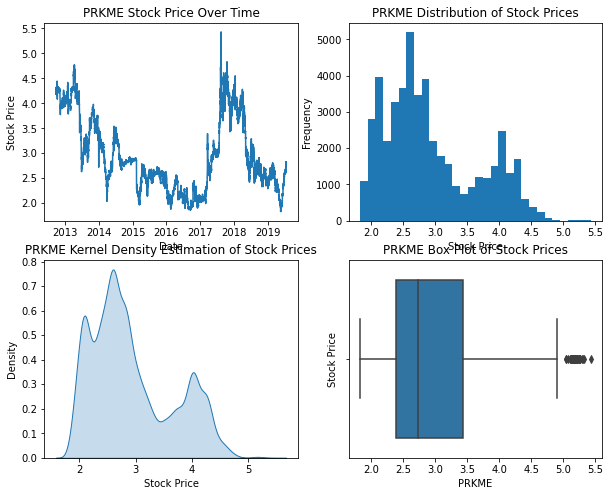

SAHOL
Skew : 0.07
Kurtosis : -0.41


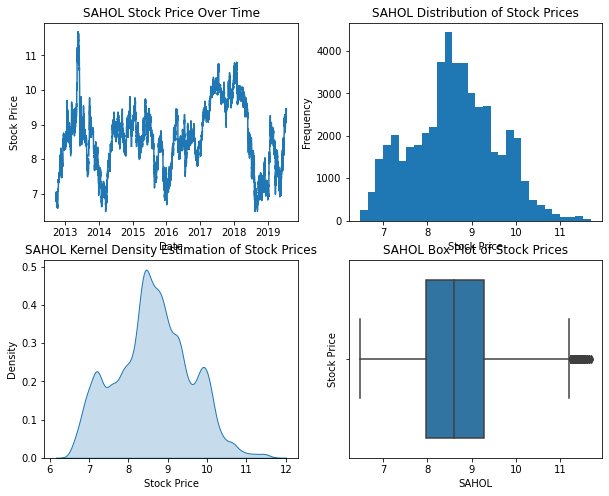

SASA
Skew : 0.83
Kurtosis : -1.02


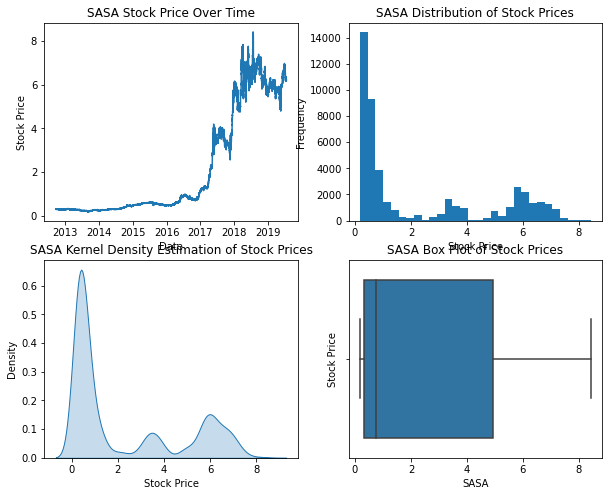

SISE
Skew : 0.51
Kurtosis : -0.78


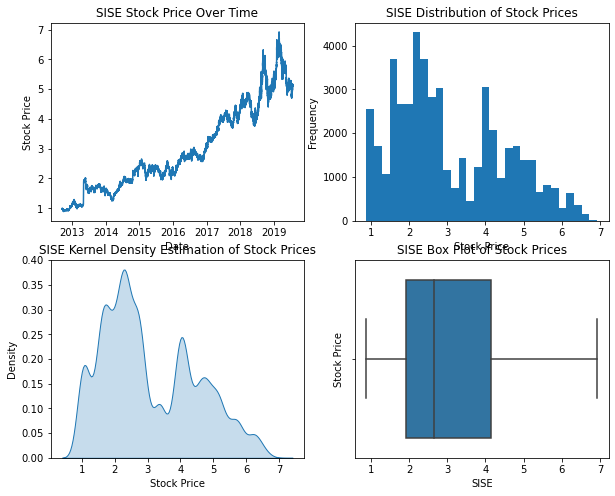

SKBNK
Skew : -0.07
Kurtosis : -1.1


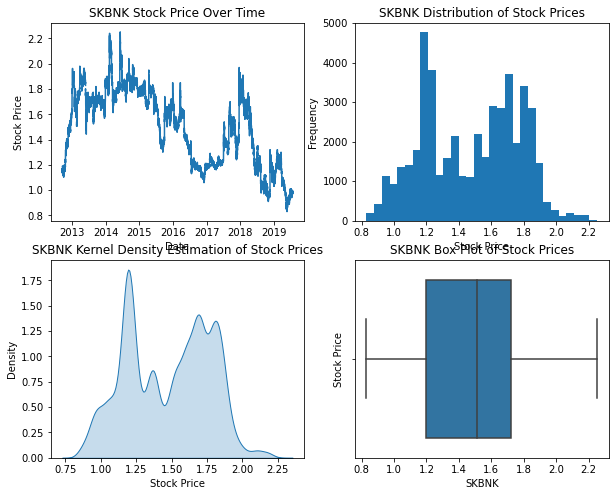

SODA
Skew : 0.54
Kurtosis : -0.66


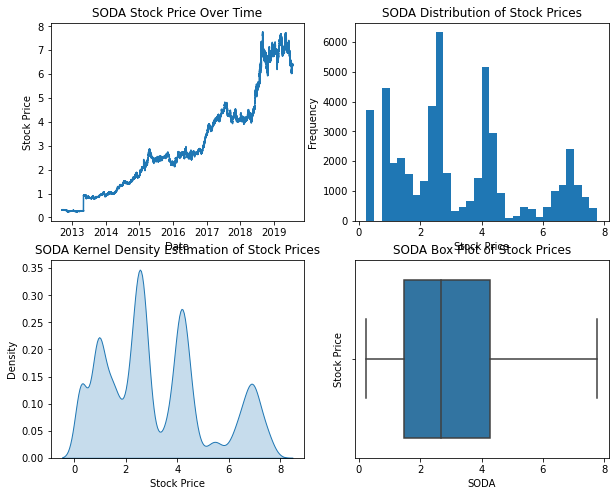

TCELL
Skew : -0.16
Kurtosis : 0.23


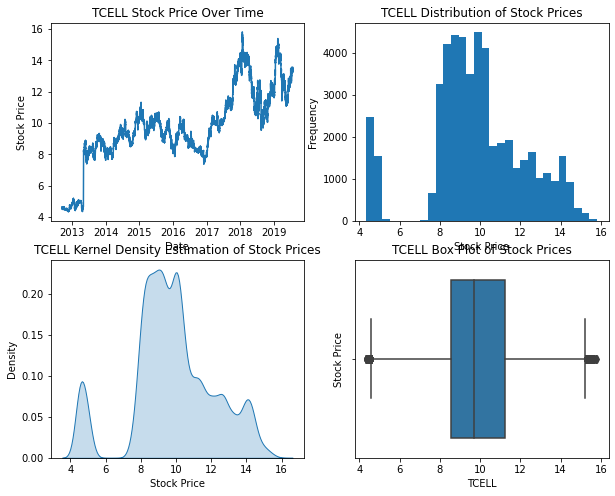

THYAO
Skew : 0.93
Kurtosis : -0.33


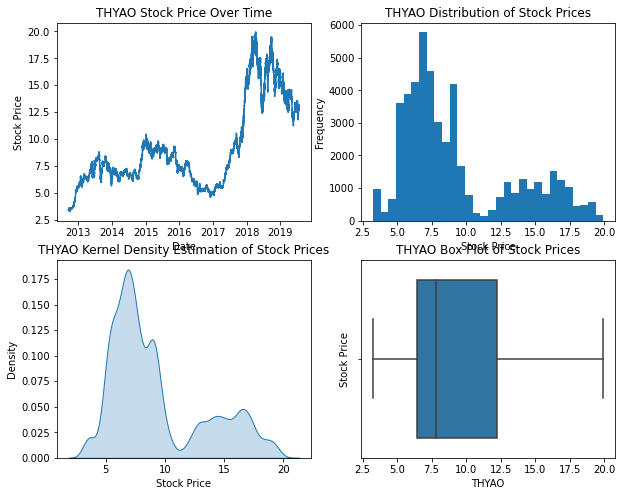

TKFEN
Skew : 1.17
Kurtosis : 0.01


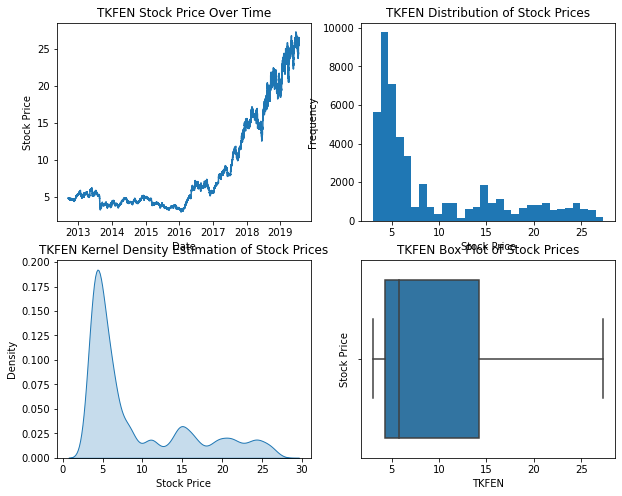

TOASO
Skew : 0.11
Kurtosis : -1.01


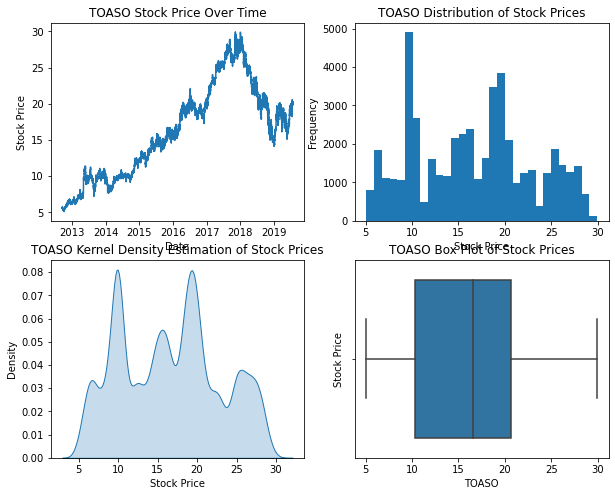

TRKCM
Skew : 0.55
Kurtosis : -0.99


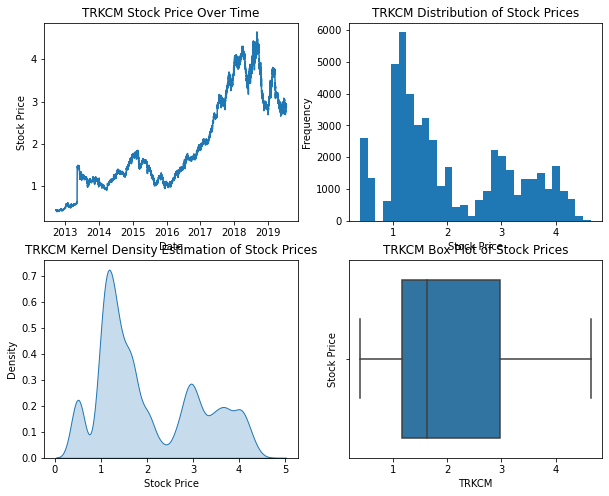

TSKB
Skew : 0.7
Kurtosis : 0.1


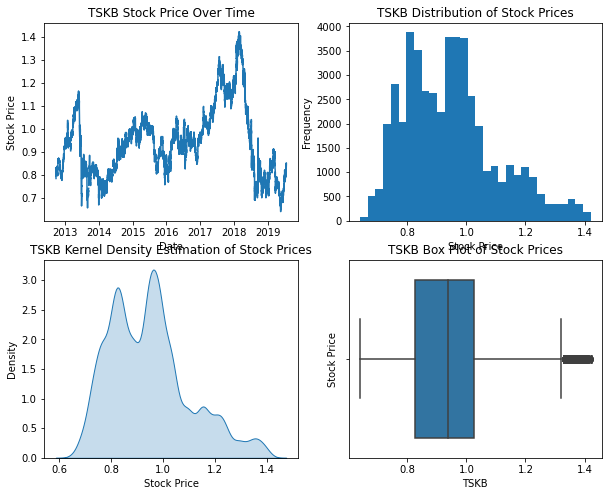

TTKOM
Skew : -0.79
Kurtosis : 0.41


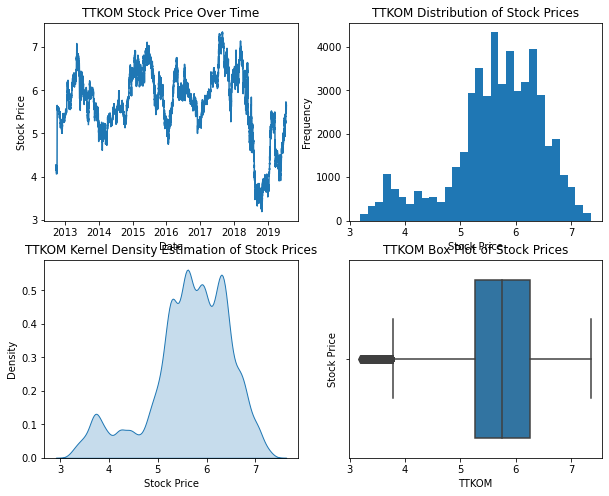

TUKAS
Skew : 1.69
Kurtosis : 3.24


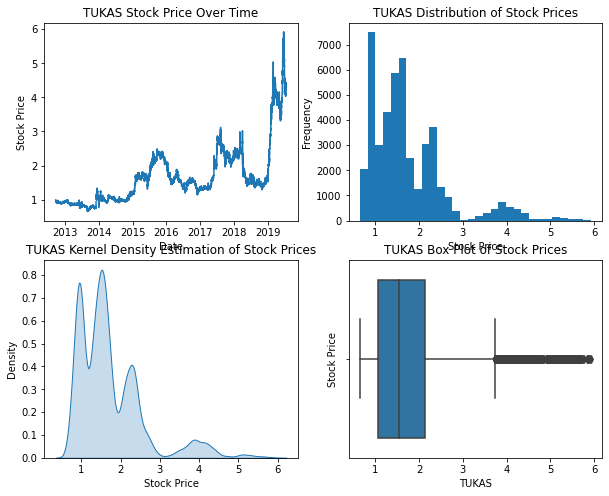

TUPRS
Skew : 0.68
Kurtosis : -0.97


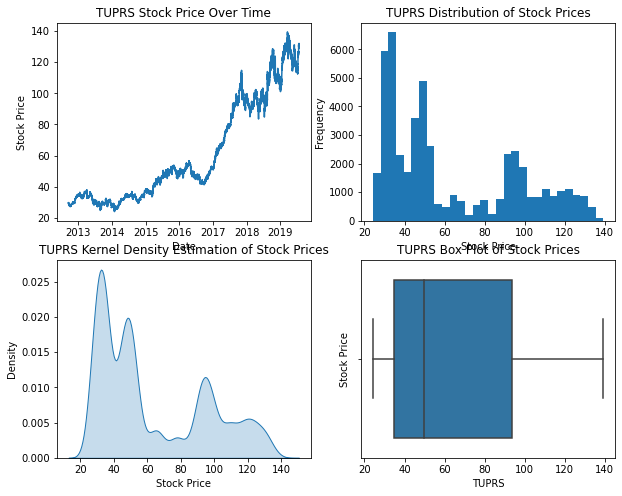

USAK
Skew : 1.3
Kurtosis : 0.83


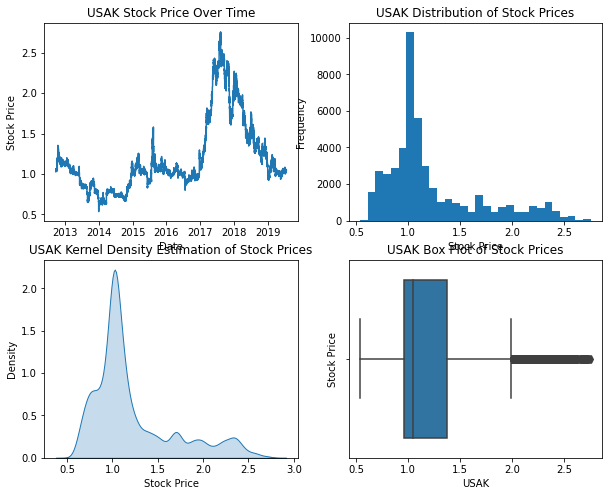

VAKBN
Skew : 0.85
Kurtosis : -0.08


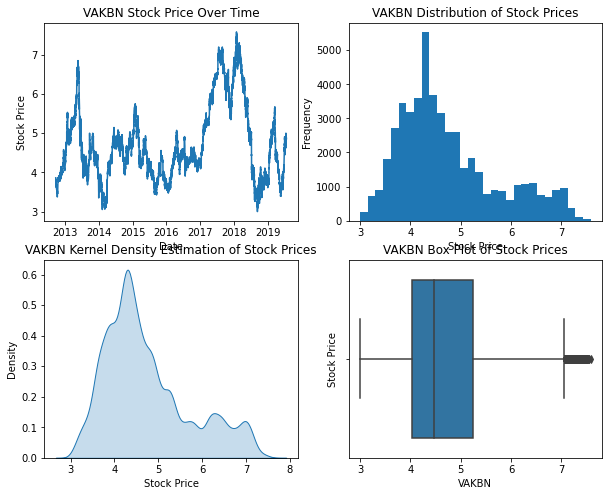

VESTL
Skew : 0.18
Kurtosis : -0.37


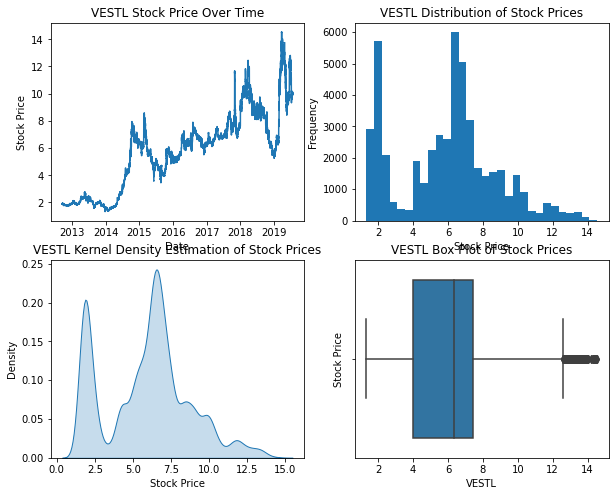

YATAS
Skew : 1.07
Kurtosis : 0.09


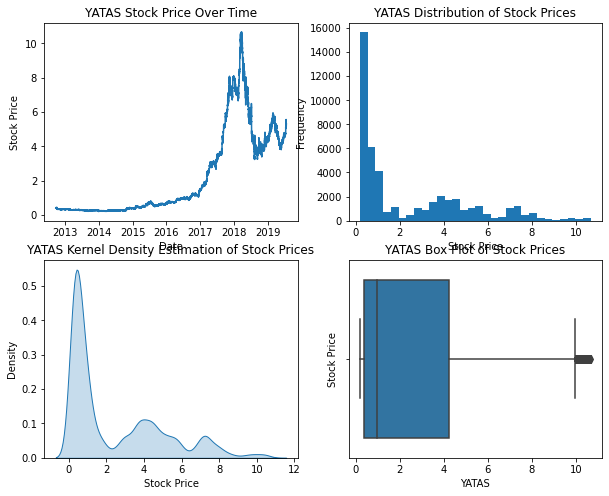

YKBNK
Skew : -0.24
Kurtosis : -0.0


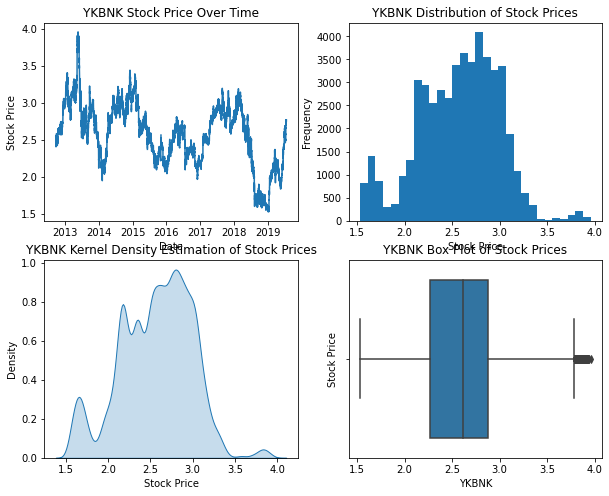

YUNSA
Skew : 0.87
Kurtosis : 0.76


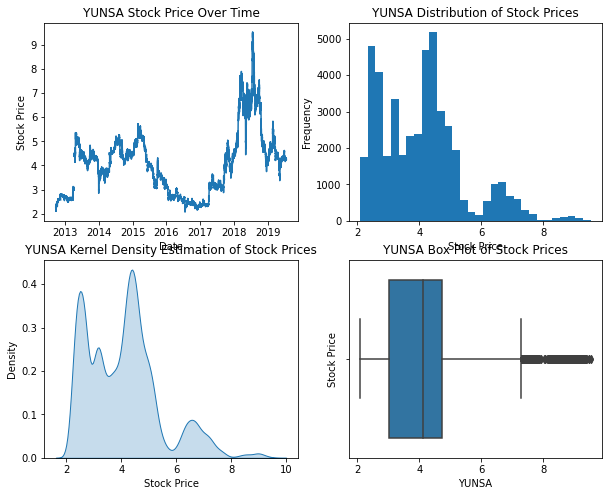

ZOREN
Skew : 0.41
Kurtosis : 0.27


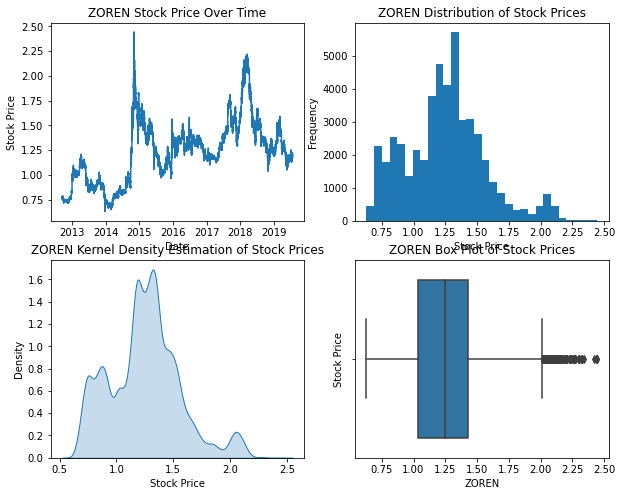

In [37]:
skew_df = []
kurtosis_df = []
cols = data.select_dtypes(include=np.number).columns.tolist()
for col in cols:
    skew = round(data[col].skew(), 2)
    kurtosis = round(data[col].kurtosis(), 2)
    skew_df.append(skew)
    kurtosis_df.append(kurtosis)
    print(col)
    print('Skew :', skew)
    print('Kurtosis :', kurtosis )
    
    plt.figure(figsize=(10, 8))
    # Create a line plot of a single stock's closing prices
    plt.subplot(2, 2, 1)
    plt.plot(data.index, data[col])
    plt.title(f'{col} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    

    #Create a histogram of a stock's closing prices
    plt.subplot(2, 2, 2)
    plt.hist(data[col], bins=30)
    plt.title(f'{col} Distribution of Stock Prices')
    plt.xlabel('Stock Price')
    plt.ylabel('Frequency')
    
    
    # Create a KDE plot of stock prices
    plt.subplot(2, 2, 3)
    sns.kdeplot(data[col], shade=True)
    plt.title(f'{col} Kernel Density Estimation of Stock Prices')
    plt.xlabel('Stock Price')
    plt.ylabel('Density')
    
    
    # Create a box plot of stock prices
    plt.subplot(2, 2, 4)
    sns.boxplot(data[col])
    plt.title(f'{col} Box Plot of Stock Prices')
    plt.ylabel('Stock Price')
    
    plt.show()

The provided code snippet creates a bar plot to visualize the **skewness** and **Kurtosis** values of different stocks over time. It uses the skewness and Kurtosis values calculated for each stock and displays them in a bar chart. 

*Negative skew refers to a longer or fatter tail on the left side of the distribution, while positive skew refers to a longer or fatter tail on the right.*

So, `GOODY` have very large skewness value, it means that this is directioned to the right. 
Besides, `ISDMR` and `TTKOM` shows negative skewness, they are on the left side of the distribution.

Text(0, 0.5, 'Skewness Values')

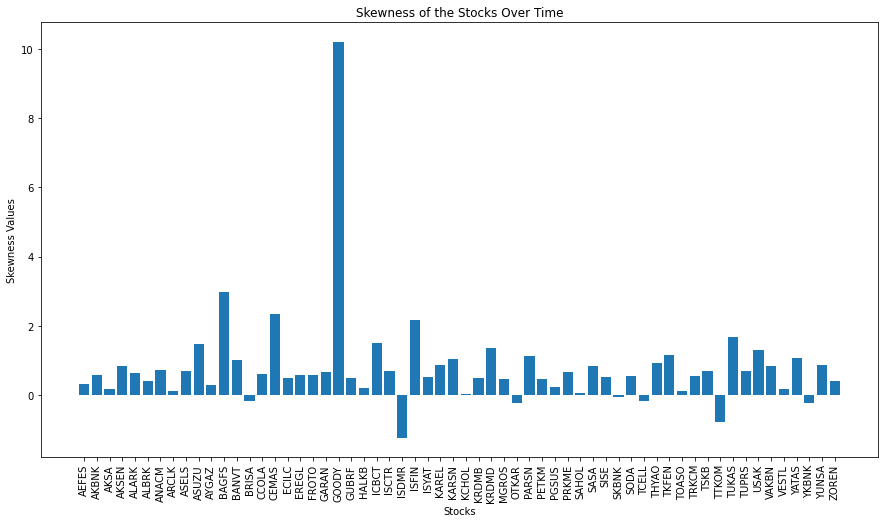

In [57]:
plt.figure(figsize=(15, 8))
plt.bar(cols, skew_df)
plt.xticks(cols, rotation='vertical')
plt.title("Skewness of the Stocks Over Time")
plt.xlabel('Stocks')
plt.ylabel('Skewness Values')

*Positive kurtosis indicates heavier tails and a more peaked distribution, while negative kurtosis suggests lighter tails and a flatter distribution.*

So, `GOODY` have very large kurtosis value, it means that this has more peaked shape. 

Text(0, 0.5, 'Kurtosis Values')

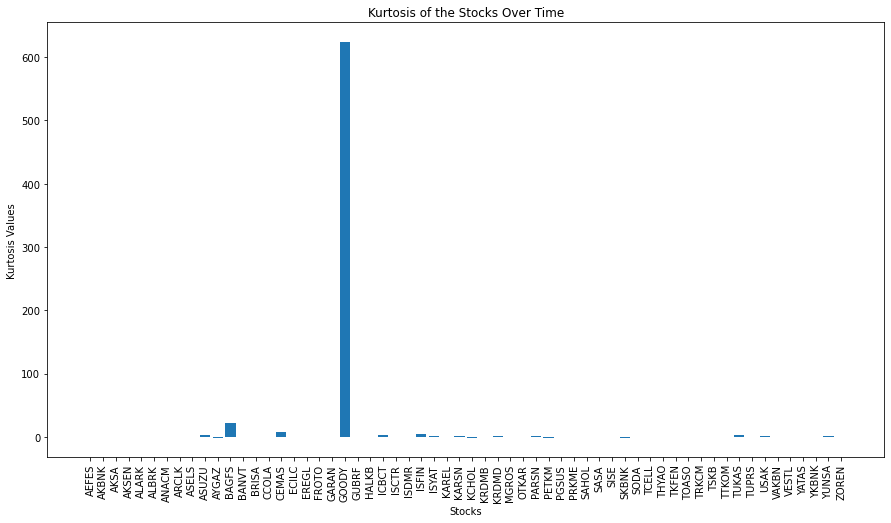

In [58]:
#Create bar plot for Kurtosis of the Stocks Over Time
plt.figure(figsize=(15, 8))
plt.bar(cols, kurtosis_df)
plt.xticks(cols, rotation='vertical')
plt.title("Kurtosis of the Stocks Over Time")
plt.xlabel('Stocks')
plt.ylabel('Kurtosis Values')

###   4.2. Moving Window Correlation

This code snippet fills missing values in the data DataFrame using forward-fill (ffill) method.

In [59]:
data.fillna(method='ffill', inplace=True)

This is the heatmap of the correlation matrix of the stocks. 

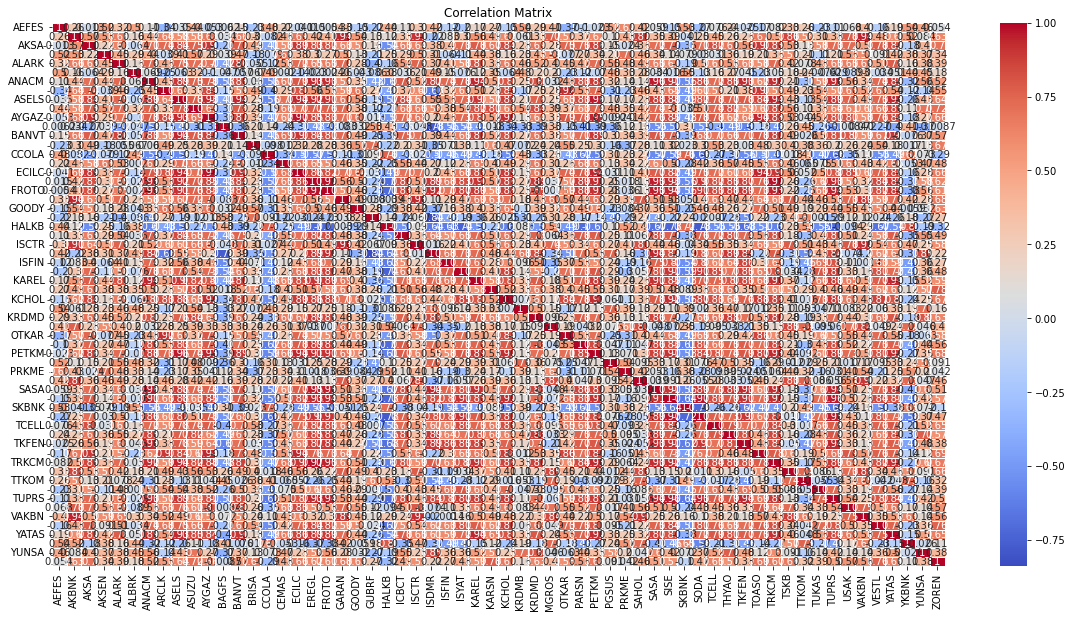

In [91]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

To choose pairs of stock for calculating their correlations over moving window, we can look at their correlation matrix at the beginning. For this purpose, I used below code. This code allows us to identify and extract pairs of stocks in dataset that have high correlations. I tried to choose stocks that are in the same sector with high correlation.

In [98]:
high_correlations = (correlation_matrix[abs(correlation_matrix) > 0.9]).stack().reset_index()
high_correlations = high_correlations.loc[high_correlations['level_0'] != high_correlations['level_1']]
high_correlations

level_0 level_1         0
2     AKBNK   GARAN  0.936389
3     AKBNK   ISCTR  0.909785
4     AKBNK   VAKBN  0.942750
10    ANACM   EREGL  0.929393
11    ANACM   FROTO  0.925011
..      ...     ...       ...
181   YATAS   ASELS  0.932127
182   YATAS   BANVT  0.901836
183   YATAS   KAREL  0.936904
184   YATAS   PETKM  0.917056
185   YATAS   TRKCM  0.913058

[130 rows x 3 columns]

This code is used to visualize how the correlation between two stocks ('AKBNK' and 'YKBNK') changes over time by using a moving window approach. It's particularly useful for analyzing the evolving relationship between two assets in a time series context. In here window size is determined as 20x26 since there are 20 days in each month and 26 operations in each day. It is aimed to take monthly interval. Moving window approach means that for each row, it computes the correlation coefficient of the previous “20x26” rows of columns “stock1” and “stock2”.


**If the plot shows a strong positive correlation, it indicates that the two variables move in the same direction within the given window. This suggests a positive relationship.**

Plot in the below demonstrates the high positive correlation between `AKBNK` and `YKBNK`

Peaks in the plot indicate periods of strong or weak correlation. This can be valuable information for understanding when and how the variables are related. There are 3 negative peaks in the plot. 

Stable Correlation: Look for periods where the correlation remains relatively stable. This suggests a consistent relationship between the two variables. 

High Correlation: Identify periods with unusually high positive correlation values. These periods suggest that the two variables move closely together within the window, indicating a strong positive relationship.

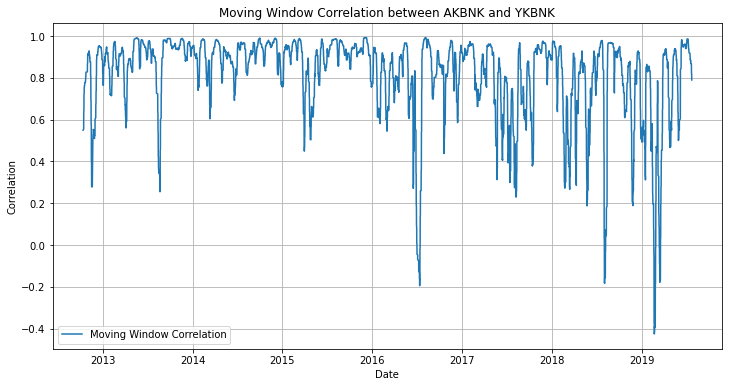

In [82]:
window_size = 20*26  # Define your desired window size
correlations = data['AKBNK'].rolling(window_size).corr(data['YKBNK'])

plt.figure(figsize=(12, 6))
plt.plot(correlations.index, correlations, label='Moving Window Correlation')
plt.title('Moving Window Correlation between AKBNK and YKBNK')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

This code is used to visualize how the correlation between two stocks ('ARCLK' and 'VESTL') changes over time by using a moving window approach.

Plot in the below demonstrates the positive correlation between `ARCLK` and `VESTL`

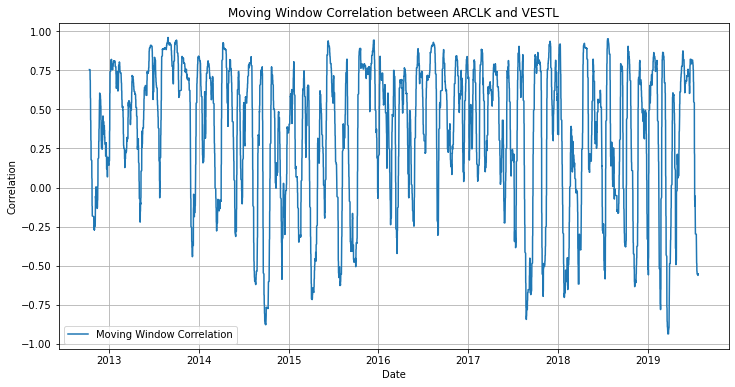

In [84]:
window_size = 20*26  # Define your desired window size
correlations = data['ARCLK'].rolling(window_size).corr(data['VESTL'])

plt.figure(figsize=(12, 6))
plt.plot(correlations.index, correlations, label='Moving Window Correlation')
plt.title('Moving Window Correlation between ARCLK and VESTL')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

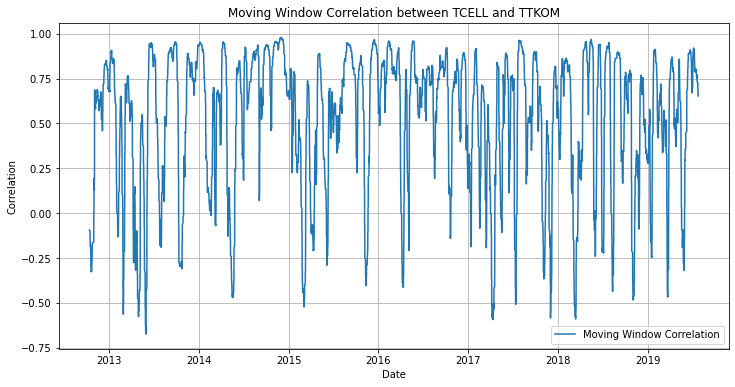

In [85]:
window_size = 20*26  # Define your desired window size
correlations = data['TCELL'].rolling(window_size).corr(data['TTKOM'])

plt.figure(figsize=(12, 6))
plt.plot(correlations.index, correlations, label='Moving Window Correlation')
plt.title('Moving Window Correlation between TCELL and TTKOM')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

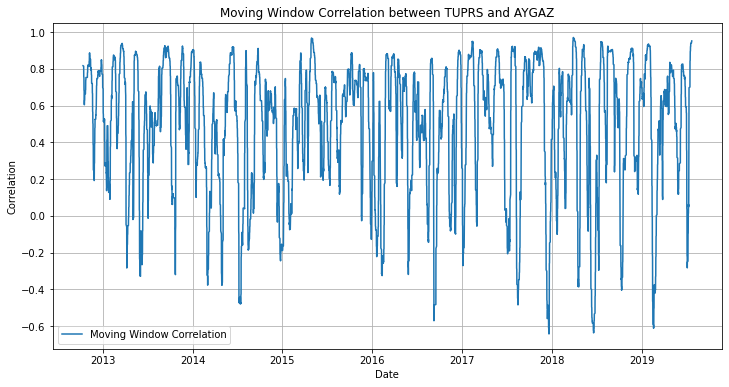

In [99]:
window_size = 20*26  # Define your desired window size
correlations = data['TUPRS'].rolling(window_size).corr(data['AYGAZ'])

plt.figure(figsize=(12, 6))
plt.plot(correlations.index, correlations, label='Moving Window Correlation')
plt.title('Moving Window Correlation between TUPRS and AYGAZ')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

###  4.3. Principal Component Analysis (PCA)

I dropped this column since their null value ratio are high. 

In [101]:
data.drop(["ISDMR", "PGSUS"], axis=1, inplace=True)

In [102]:
data.shape

(50011, 58)

PCA is a dimensionality reduction technique that can help identify the most important features in data and reduce its dimensionality. It's often used for visualizing data in a lower-dimensional space while retaining most of the data's variance. 

`scaled_data = scaler.fit_transform(data)` scales (standardizes) the original data using the StandardScaler. This step ensures that each feature has a mean of 0 and a standard deviation of 1.

PCA(n_components=2) initializes a PCA object with the number of principal components set to 2. This means that PCA will reduce the dimensionality of the data to retain only the top 2 principal components. At the beginning of this part, I want to see how would 2 components cover the dataset. 

`print(pca.explained_variance_)` prints the explained variance of each principal component.

`print(pca.explained_variance_ratio_)` prints the explained variance ratio of each principal component, which indicates the proportion of total variance explained by each component.

`np.cumsum(pca.explained_variance_ratio_)` computes the cumulative explained variance. This array shows how much variance is explained by adding successive principal components.


**The result [0.51344291 0.17537393] obtained from pca.explained_variance_ratio_** means that when we perform Principal Component Analysis (PCA) on data, the first principal component (PC1) explains approximately 51.34% of the total variance in the data, and the second principal component (PC2) explains approximately 17.54% of the total variance.
These values represent the proportion of the total variance in the data that is captured by each principal component. In this case, the first principal component captures the majority of the variance, and the second component captures a smaller portion. The sum of these explained variances indicating that these two components collectively account for 68.88% (approximately) of the total variance in the data.

We can interpret this result as follows:
PC1 explains the most significant and common pattern or variation in the data.
PC2 captures the second most significant pattern, which is orthogonal (uncorrelated) to PC1.

In [108]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print(pca_data)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

            PC1       PC2
0     -8.376222  0.697787
1     -8.397797  0.780782
2     -8.391598  0.777022
3     -8.387257  0.767627
4     -8.383927  0.738722
...         ...       ...
50006  7.412638  2.727557
50007  7.387706  2.776130
50008  7.442361  2.764000
50009  7.403829  2.771878
50010  7.395552  2.768563

[50011 rows x 2 columns]
[29.7804258  10.16931912]
[0.51344535 0.17532958]


array([0.51344535, 0.68877493])

This code snippet generates a scatter plot to visualize the result of PCA with two principal components.

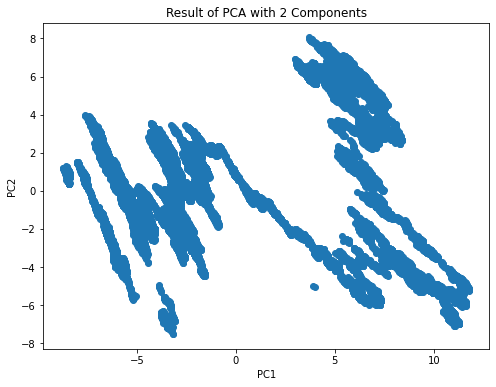

In [110]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data['PC1'], pca_data['PC2'], marker='o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Result of PCA with 2 Components')
plt.show()

After 2 components PCA, we saw that 2 principal components are not sufficient to explain majority of the total variance in the data. For this purpose, plot in the below helps us to determine how many principal components is enough to capture a desired amount of variance in the data. In this case, the red line at 90% cumulative explained variance provides a threshold for dimensionality reduction.
As can be seen from the graph, when we select approximately 5 components, we reach a level that can represent 90% of the total data. 

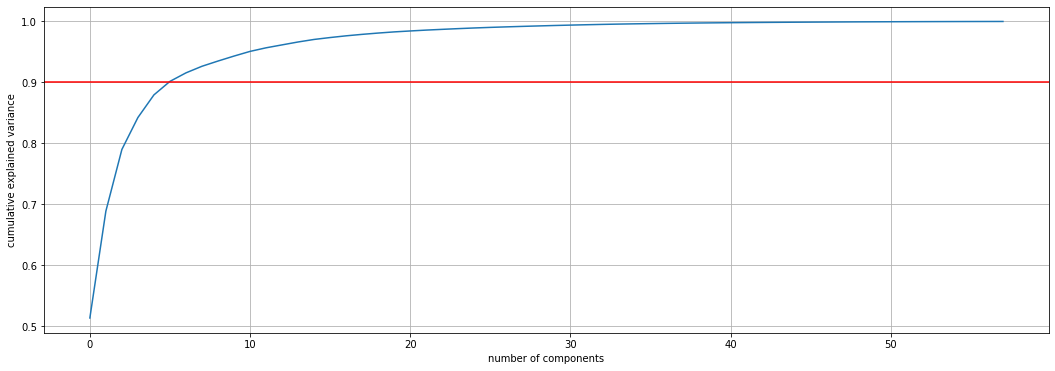

In [111]:
pca = PCA().fit(scaled_data)
plt.figure(figsize=(18,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.90, c="r")
plt.grid(True)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()

**The result [0.51344535 0.17532958 0.10123518 0.05238714 0.03712662] obtained from pca.explained_variance_ratio_** means that when we perform Principal Component Analysis (PCA) on data, the first principal component (PC1) explains approximately 51.34% of the total variance in the data, and the second principal component (PC2) explains approximately 17.54% of the total variance. Third, fourth and fifth principal component explains approximately 10.1%, 5.2% and 3.7% of the total variance, respectively.
The sum of these explained variances indicating that these five components collectively account for 87.9% (approximately) of the total variance in the data.

In the context of stock price data, the first few principal components can represent latent variables capturing underlying patterns in the data. 
First Principal Component (PC1): PC1 captures the most significant and common trend or pattern shared by the stock prices. It might represent a general market trend affecting all the stocks.
Second Principal Component (PC2): PC2 captures the second most significant pattern that is orthogonal to PC1. It represents variation that is independent of the first component. 

In [113]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pca = PCA(n_components=5) 
pca_result = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

print(pca_data)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

            PC1       PC2       PC3       PC4       PC5
0     -8.376222  0.697787 -0.921100 -4.030670  2.947598
1     -8.397797  0.780782 -0.908207 -4.027612  2.966600
2     -8.391598  0.777022 -0.913397 -4.046208  2.946275
3     -8.387257  0.767627 -0.895911 -4.030754  2.957907
4     -8.383927  0.738722 -0.924103 -4.021175  2.944229
...         ...       ...       ...       ...       ...
50006  7.412638  2.727557  0.365928 -0.699409 -4.454474
50007  7.387706  2.776130  0.356792 -0.715648 -4.444692
50008  7.442361  2.764000  0.376570 -0.691138 -4.504464
50009  7.403829  2.771878  0.402755 -0.696706 -4.478905
50010  7.395552  2.768563  0.403292 -0.729060 -4.475578

[50011 rows x 5 columns]
[29.7804258  10.16931912  5.87175807  3.03851494  2.15338722]
[0.51344535 0.17532958 0.10123518 0.05238714 0.03712662]


array([0.51344535, 0.68877493, 0.79001012, 0.84239726, 0.87952388])

This code snippet creates a bar plot to visualize the variance explained by each principal component.

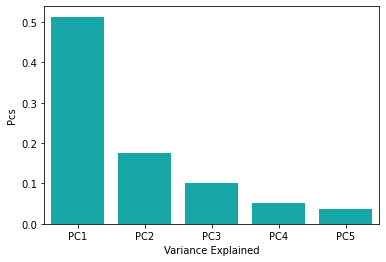

In [114]:
dfs=pd.DataFrame({"var":pca.explained_variance_ratio_,"PC":['PC1', 'PC2','PC3','PC4', 'PC5']})
sns.barplot(x="PC",y="var",data=dfs,color="c")
plt.xlabel("Variance Explained")
plt.ylabel("Pcs");
plt.show()

###   4.4. Inference with Google Trends:

The provided CSV file contains data from Google Trends related to the search term "Tüpraş." Google Trends is a service offered by Google that allows users to analyze the popularity and search interest of specific keywords or terms over time.

In [124]:
tupras_google_trend = pd.read_csv('tupras_google_trend.csv')
tupras_google_trend.timestamp =pd.to_datetime(tupras_google_trend.timestamp, format='%Y-%m')
tupras_google_trend.set_index('timestamp',inplace=True)
tupras_google_trend

tupras
timestamp         
2012-10-01      30
2012-11-01      30
2012-12-01      27
2013-01-01      28
2013-02-01      54
...            ...
2019-03-01      57
2019-04-01      56
2019-05-01      69
2019-06-01      60
2019-07-01     100

[82 rows x 1 columns]

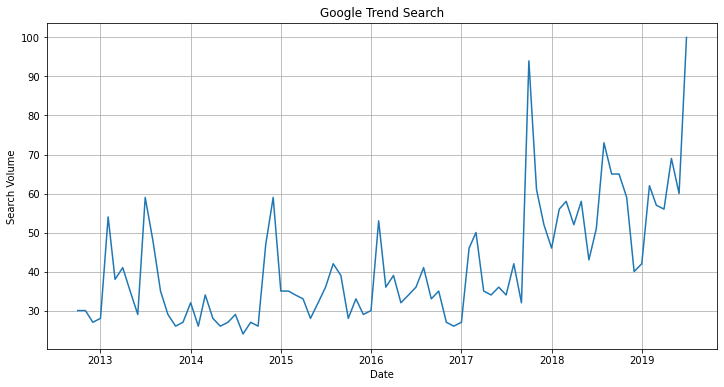

In [128]:
plt.figure(figsize=(12, 6))
plt.plot(tupras_google_trend.index, tupras_google_trend.tupras, label='Tüpraş Google trend search')
plt.xlabel('Date')
plt.ylabel('Search Volume')
plt.title('Google Trend Search')
plt.grid(True)
plt.show()

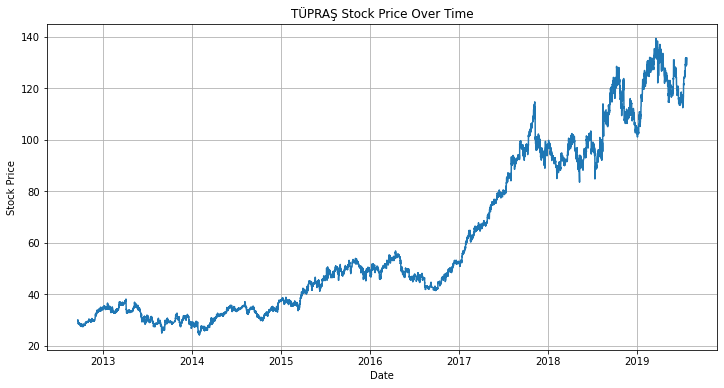

In [136]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data.TUPRS)
plt.title("TÜPRAŞ Stock Price Over Time")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

This code snippet creates a plot to visualize the relationship between the stock price of TUPRAS and the Google Trend search volume for the term "Tüpraş" over time.
When we look at the plot, we can say that there is apattern between Tüpraş Stock price and search volume from google Trend. Besides, there is a high peak at 2017 October in both plot. 

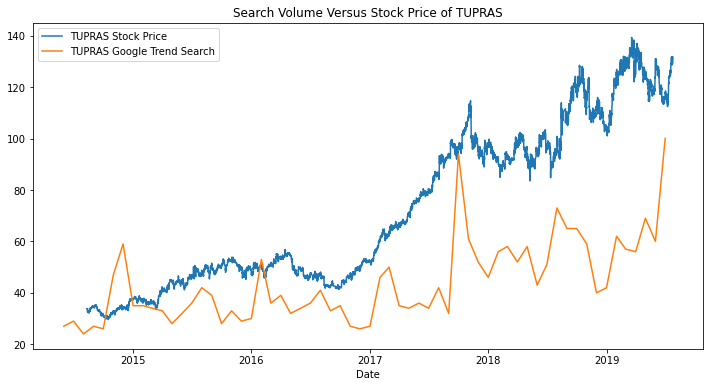

In [157]:
plt.figure(figsize=(12, 6))
# plt.axvline(tupras_google_trend.index[61:62], c="r", linestyle="--", linewidth=0.5)
plt.plot(data.index[len(data) // 4:], data.TUPRS[len(data) // 4:], label='TUPRAS Stock Price')
plt.plot(tupras_google_trend.index[len(tupras_google_trend) // 4:], tupras_google_trend.tupras[len(tupras_google_trend) // 4:], label='TUPRAS Google Trend Search')
plt.xlabel('Date')
plt.title('Search Volume Versus Stock Price of TUPRAS')
plt.legend()
plt.show()

When we search "Tüpraş" with this specific date, we can find a lot of news about an explosion in factory of Tüpraş. Interestingly, after that explosion, the stock price increased.

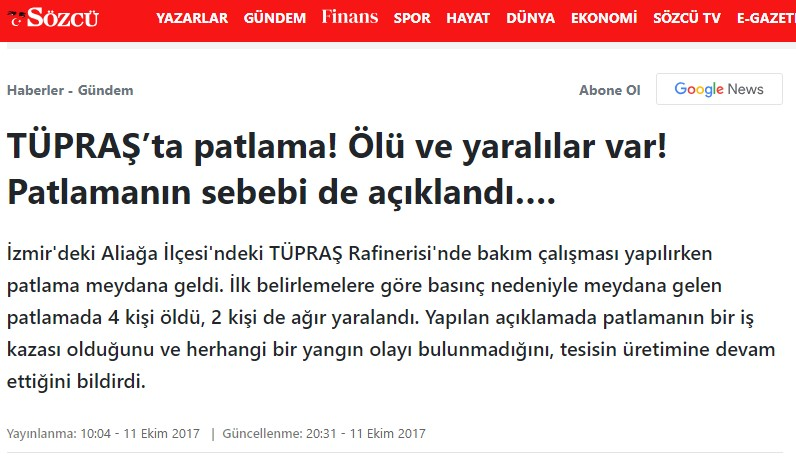

### Appendix

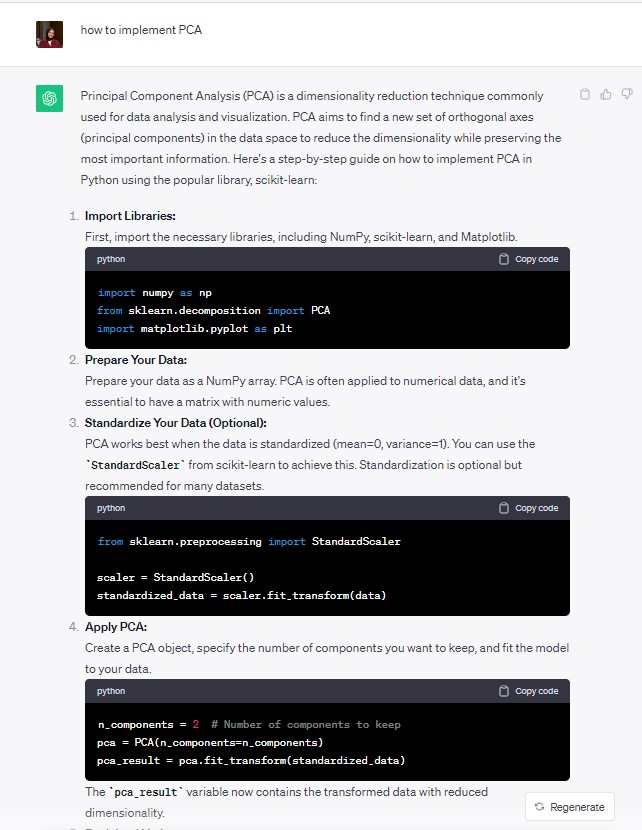